In [1]:
#	TODO visualizaciones: 
#		-cambios en base a rotacion
#		-cambios en base a tempreratura
#		-cambios en base a g

#		-distribucion de los datos por variable
#		-rango de las variables

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# constants
path = 'C:/Users/Asus/Documents/2023_2/Memoria/src'

red = '5F0003'
blue = '206ED5'
orange = 'F38735'

# Ostar
O_df = pd.read_csv(path+'/Data/o_spectral_lines.csv',index_col=0)
# Bstar
B_df = pd.read_csv(path+'/Data/b_spectral_lines.csv',index_col=0)

In [3]:
# src = https://medium.com/@BrendanArtley/matplotlib-color-gradients-21374910584b
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

In [4]:
def tendencyLine(spectra,paramValue,c):
	plt.plot([float(i) for i in spectra.keys()],spectra.values,c=c)

# O-Star

- Paremeter grid

<img src="./img/stellarParametersO.jpg" width="500"/>

### Distributions

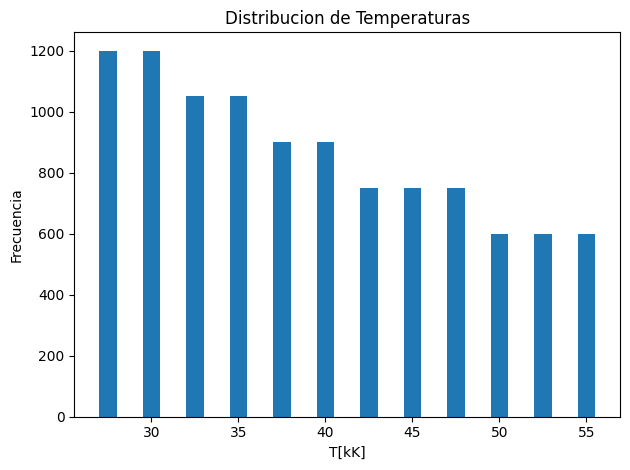

In [105]:
plt.bar(
  x=[27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50, 52.5, 55],
  height=O_df.temperature.value_counts().values,
  width=1,
  linewidth=5)
plt.title('Distribucion de Temperaturas')
plt.xlabel('T[kK]')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [235]:
# dataframe setup
target = ['temperature','g','v']
x = O_df.drop(target,axis=1)
y = O_df[target]

In [236]:
y.describe()

,temperature,g,v
count,10350.000000,10350.000000,10350.0000
mean,39166.666667,411.231884,226.5000
std,8488.110742,48.069348,129.9072
min,27500.000000,300.000000,3.0000
25%,32500.000000,375.000000,114.0000
50%,37500.000000,425.000000,226.5000
75%,45000.000000,450.000000,339.0000
max,55000.000000,475.000000,450.0000


In [237]:
# parametra values lists
t_list = y['temperature'].unique()
g_list = y['g'].unique()
v_list = y['v'].unique()

- Tendencia temperatura

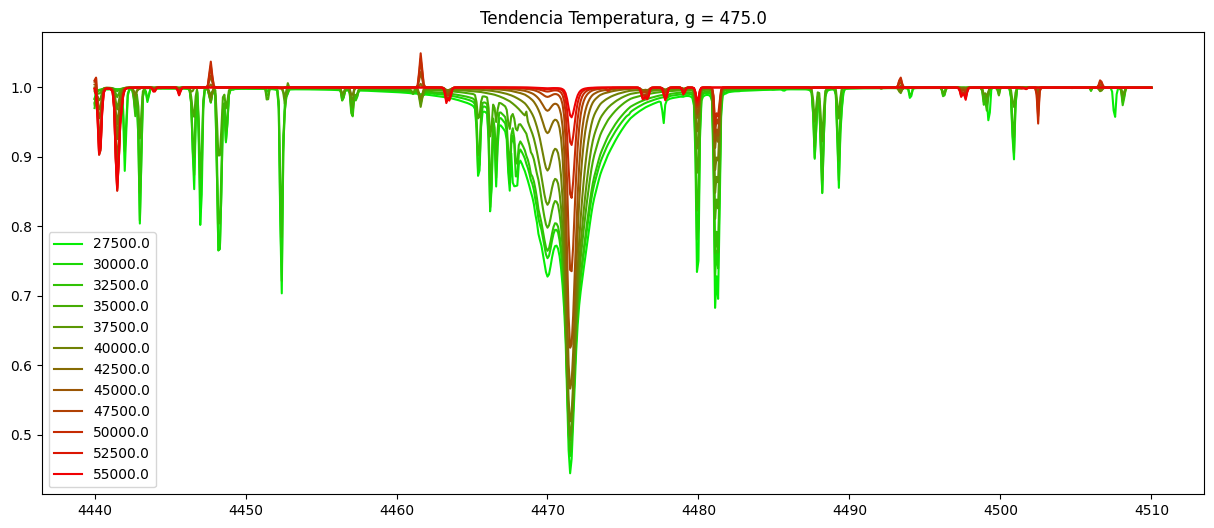

In [238]:
g = g_list[-1]
v = y[y.g == g].v.min()
matchingTemperatures = y[y.g == g].temperature.unique()
matchingTemperatures.sort()

color = get_color_gradient(blue,red,len(matchingTemperatures))

plt.figure(figsize=(15,6))

for i,t in enumerate(matchingTemperatures):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(t)),color[i])

plt.legend(matchingTemperatures)
plt.title('Tendencia Temperatura, g = '+ str(g))
plt.show()

- Tendencia en log g

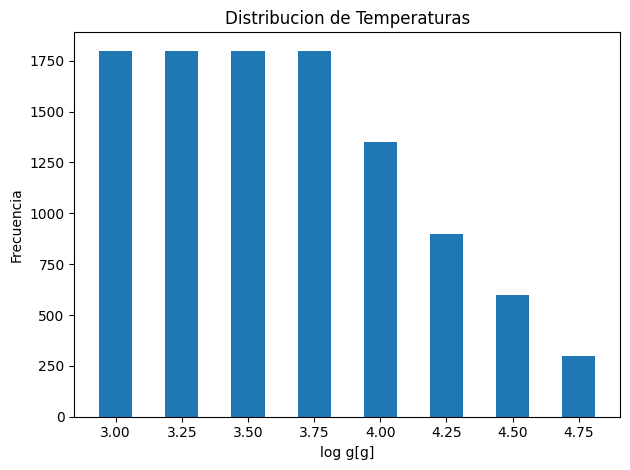

In [107]:
plt.bar(
  x=[ 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5,4.750],
  height=O_df.g.value_counts().values,
  width=0.125,
  linewidth=5)
plt.title('Distribucion de Temperaturas')
plt.xlabel('log g[g]')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

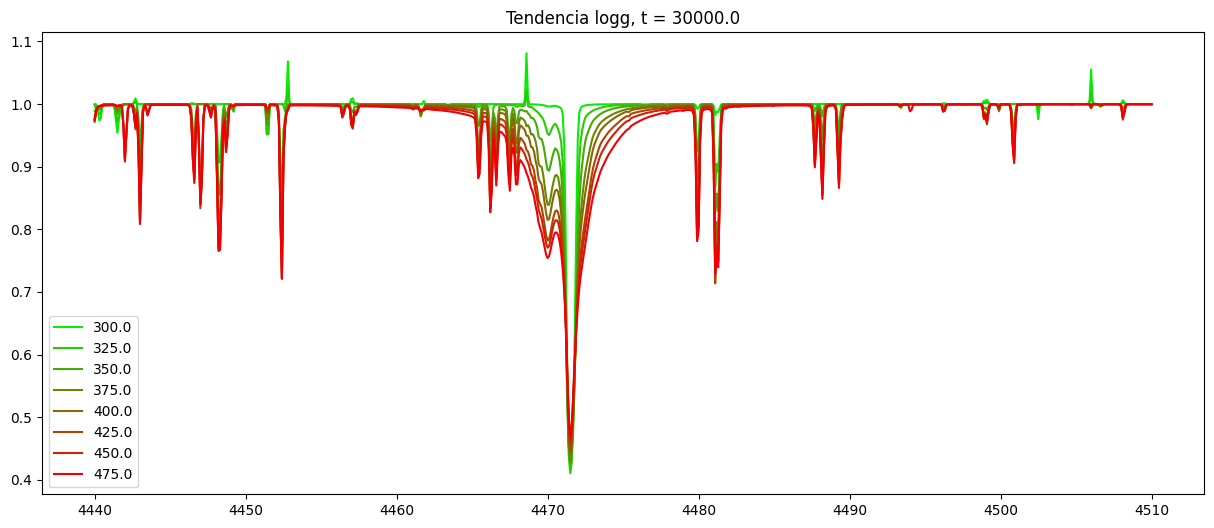

In [239]:
t = t_list[1]
v = y[y.temperature == t].v.min()
matchingGs = y[y.temperature == t].g.unique()

color = get_color_gradient(blue,red,len(matchingGs))

plt.figure(figsize=(15,6))

for i,g in enumerate(matchingGs):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(t)),color[i])

plt.legend(matchingGs)
plt.title('Tendencia logg, t = '+str(t))
plt.show()

- Tendencia en V

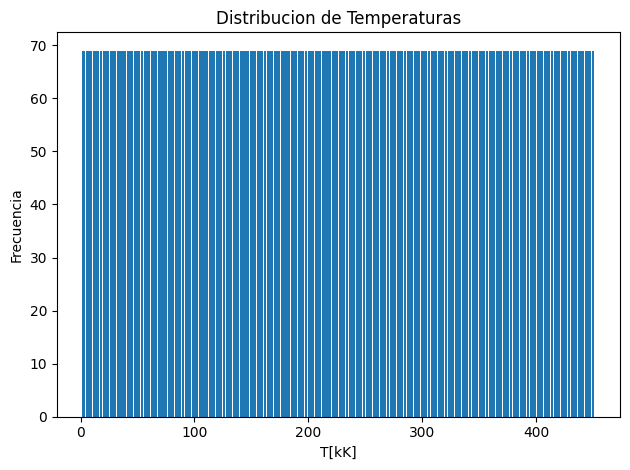

In [99]:
plt.bar(
  x=[i for i in range(3,451,3)],
  height=O_df.v.value_counts().values,
  width=2.5,)
plt.title('Distribucion de Temperaturas')
plt.xlabel('T[kK]')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

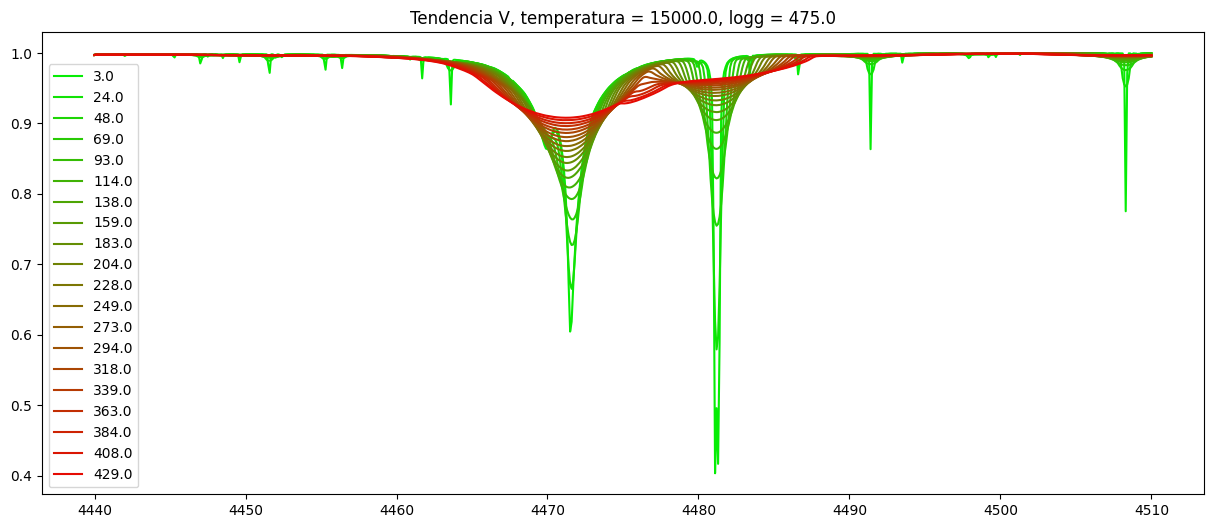

In [248]:
import math

g = g_list.max()
t = y[y.g == g].temperature.min()
matchingVs = y[(y.g == g) & (y.temperature == t)].v.unique()
matchingVs.sort()

color = get_color_gradient(blue,red,len(matchingVs))

plt.figure(figsize=(15,6))

n = 20
plotedVs = []

for i in [math.floor(j*len(matchingVs)/n) for j in range(n)]:
  value = matchingVs[i] 
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == value)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(value)),color[i])
  plotedVs.append(value)

plt.legend(plotedVs)
plt.title('Tendencia V, temperatura = '+ str(t) + ', logg = '+ str(g))
plt.show()

# B-Star

- parameter grid

<img src="./img/stellarParametersB.jpg" width="500"/>

- Tendencia en Temperatura

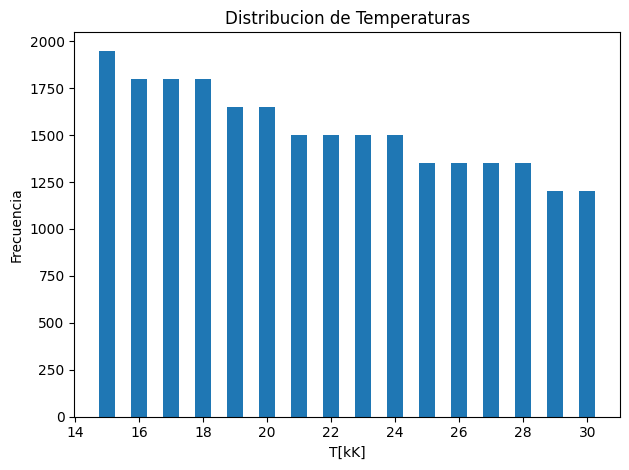

In [111]:
plt.bar(
  x=[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
  height=B_df.temperature.value_counts().values,
  width=0.5,
  linewidth=5)
plt.title('Distribucion de Temperaturas')
plt.xlabel('T[kK]')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [241]:
# dataframe setup
target = ['temperature','g','v']
x = B_df.drop(target,axis=1)
y = B_df[target]

In [242]:
y.describe()

,temperature,g,v
count,24450.000000,24450.000000,24450.00000
mean,21852.760736,357.515337,226.50000
std,4593.010759,77.695289,129.90358
min,15000.000000,175.000000,3.00000
25%,18000.000000,300.000000,114.00000
50%,22000.000000,350.000000,226.50000
75%,26000.000000,425.000000,339.00000
max,30000.000000,475.000000,450.00000


In [243]:
# parametra values lists
t_list = y['temperature'].unique()
g_list = y['g'].unique()
v_list = y['v'].unique()

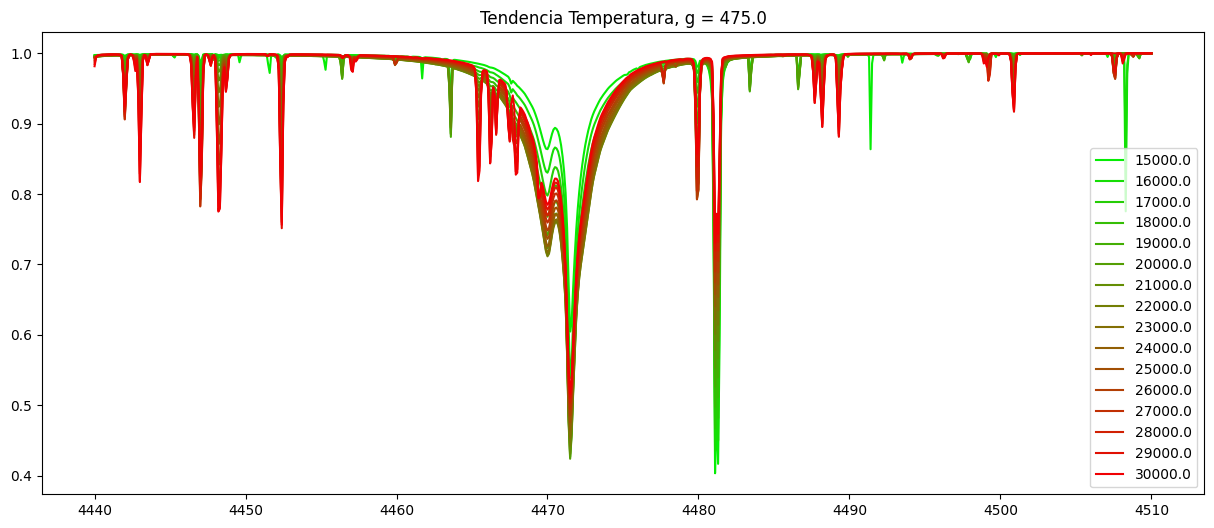

In [244]:
g = g_list[-1]
v = y[y.g == g].v.min()
matchingTemperatures = y[(y.g == g) & (y.v == v)].temperature.unique()

color = get_color_gradient(blue,red,len(matchingTemperatures))

plt.figure(figsize=(15,6))

for i,t in enumerate(matchingTemperatures):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(t)),color[i])

plt.legend(matchingTemperatures)
plt.title('Tendencia Temperatura, g = '+ str(g))
plt.show()

- Tendencia en log g

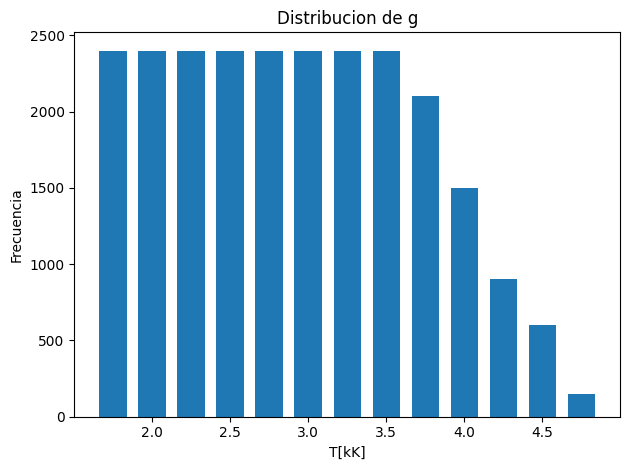

In [117]:
plt.bar(
  x=[1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75],
  height=B_df.g.value_counts().values,
  width=0.175,
  linewidth=5)
plt.title('Distribucion de g')
plt.xlabel('T[kK]')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

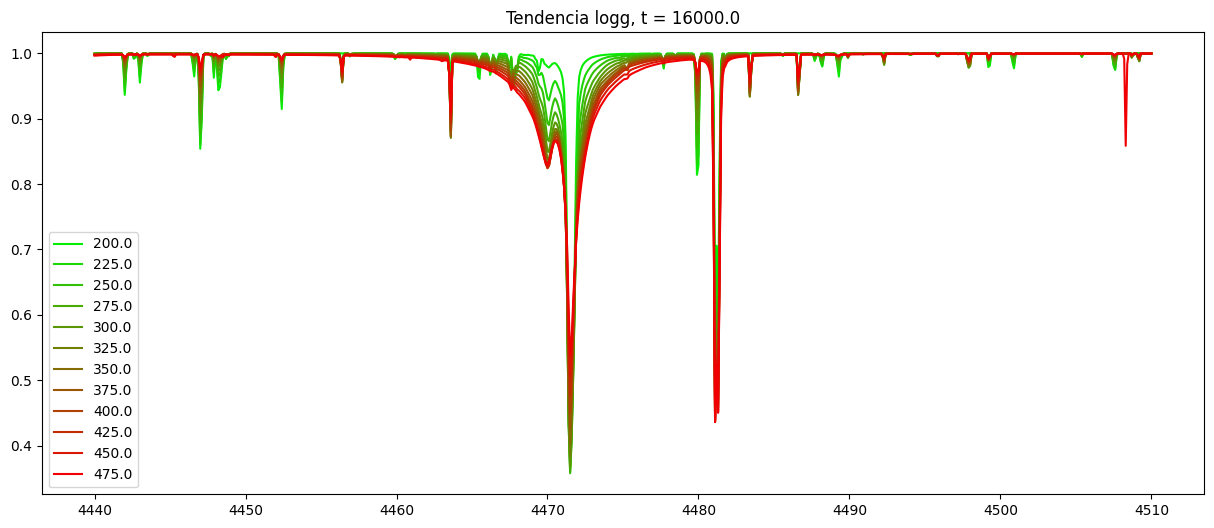

In [245]:
t = t_list[1]
v = y[y.temperature == t].v.min()
matchingGs = y[y.temperature == t].g.unique()

color = get_color_gradient(blue,red,len(matchingGs))

plt.figure(figsize=(15,6))

for i,g in enumerate(matchingGs):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(t)),color[i])

plt.legend(matchingGs)
plt.title('Tendencia logg, t = '+str(t))
plt.show()

- Tendencia en V

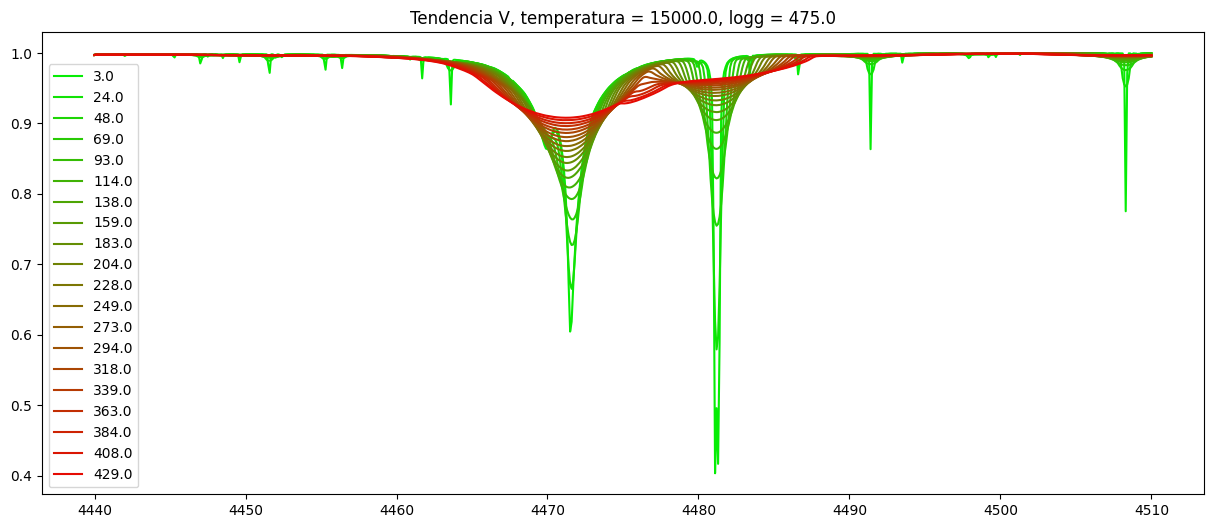

In [247]:
import math

g = g_list.max()
t = y[y.g == g].temperature.min()
matchingVs = y[(y.g == g) & (y.temperature == t)].v.unique()
matchingVs.sort()

color = get_color_gradient(blue,red,len(matchingVs))

plt.figure(figsize=(15,6))

n = 20
plotedVs = []

for i in [math.floor(j*len(matchingVs)/n) for j in range(n)]:
  value = matchingVs[i] 
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == value)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(value)),color[i])
  plotedVs.append(value)

plt.legend(plotedVs)
plt.title('Tendencia V, temperatura = '+ str(t) + ', logg = '+ str(g))
plt.show()